# Check Resume

In [1]:
import io
from pdfminer.converter import TextConverter
from pdfminer.pdfinterp import PDFPageInterpreter
from pdfminer.pdfinterp import PDFResourceManager
from pdfminer.pdfpage import PDFPage

# Docx resume
import docx2txt

# Wordcloud
import re
import operator
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
set(stopwords.words('english'))
from wordcloud import WordCloud
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [49]:
with open("../static/data/keywords.json") as content:
    terms = json.load(content)

In [2]:
def read_pdf_resume(pdf_doc):
    resource_manager = PDFResourceManager()
    fake_file_handle = io.StringIO()
    converter = TextConverter(resource_manager, fake_file_handle)
    page_interpreter = PDFPageInterpreter(resource_manager, converter)

    with open(pdf_doc, 'rb') as fh:
        for page in PDFPage.get_pages(fh, caching=True,check_extractable=True):
            page_interpreter.process_page(page)
        text = fake_file_handle.getvalue()

    # close open handles
    converter.close()
    fake_file_handle.close()
    if text:
        return text

In [3]:
def read_word_resume(word_doc):
    resume = docx2txt.process(word_doc)
    resume = str(resume)
    #print(resume)
    text =  ''.join(resume)
    text = text.replace("\n", "")
    if text:
        return text

In [4]:
def clean_job_decsription(jd):
    """A function to create a word cloud based on the input text parameter.
    """
    ## Clean the Text
    # Lower
    clean_jd = jd.lower()
    # remove punctuation
    clean_jd = re.sub(r'[^\w\s]', '', clean_jd)
    # remove trailing spaces
    clean_jd = clean_jd.strip()
    # remove numbers
    clean_jd = re.sub('[0-9]+', '', clean_jd)
    # tokenize 
    clean_jd = word_tokenize(clean_jd)
    # remove stop words
    stop = stopwords.words('english')
    clean_jd = [w for w in clean_jd if not w in stop] 
    return(clean_jd)

In [6]:
def create_word_cloud(jd):
    corpus = jd
    fdist = FreqDist(corpus)
    #print(fdist.most_common(100))
    words = ' '.join(corpus)
    words = words.split()

    # create a empty dictionary  
    data = dict() 

    #  Get frequency for each words where word is the key and the count is the value  
    for word in (words):     
        word = word.lower()     
        data[word] = data.get(word, 0) + 1 
    # Sort the dictionary in reverse order to print first the most used terms
    dict(sorted(data.items(), key=operator.itemgetter(1),reverse=True)) 
    word_cloud = WordCloud(width = 800, height = 800, 
    background_color ='white',max_words = 500) 
    word_cloud.generate_from_frequencies(data) 

    # plot the WordCloud image
    plt.figure(figsize = (10, 8), edgecolor = 'k')
    plt.imshow(word_cloud,interpolation = 'bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [8]:
def get_resume_score(text):
    cv = CountVectorizer(stop_words='english')
    count_matrix = cv.fit_transform(text)
    #Print the similarity scores
    print("\nSimilarity Scores:")
     
    #get the match percentage
    matchPercentage = cosine_similarity(count_matrix)[0][1] * 100
    matchPercentage = round(matchPercentage, 2) # round to two decimal
     
    print("Your resume matches about "+ str(matchPercentage)+ "% of the job description.")

Enter File Extension: pdf
Enter File Path: ../static/data/IshaniKathuria-Resume.pdf

Enter the Job Description: data science


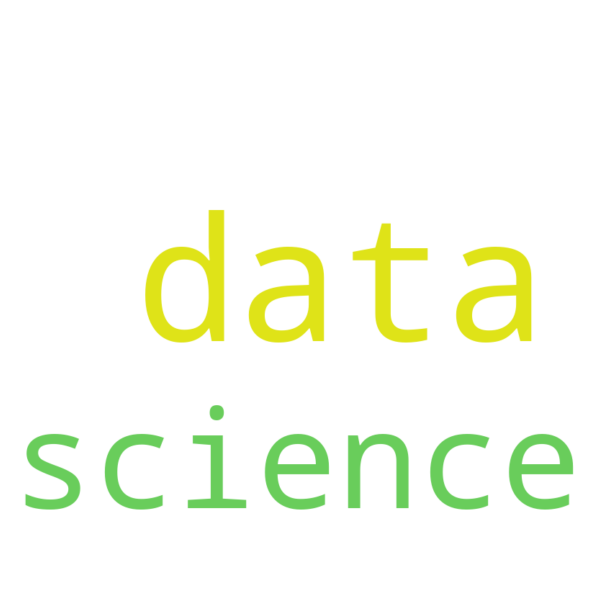


Similarity Scores:
Your resume matches about 32.72% of the job description.


In [13]:
if __name__ == '__main__':
    extn = input("Enter File Extension: ")
    file_path = input("Enter File Path: ")

    if extn == "pdf":
        resume = read_pdf_resume(file_path)
    else:
        resume = read_word_resume(file_path)

    job_description = input("\nEnter the Job Description: ")

    ## Get a Keywords Cloud
    clean_jd = clean_job_decsription(job_description)
    create_word_cloud(clean_jd)
    text = [resume, job_description]

    ## Get a Match score
    get_resume_score(text)

In [16]:
read_pdf_resume("../static/data/temp resume.pdf")

' ISHANI KATHURIA New Delhi, India · +91-8130199665 ishani@kathuria.net · Ishani Kathuria | LinkedIn · Ishani Kathuria To replace this text with your own, just click it and start typing. Briefly state your career objective, or summarize what makes you stand out. Use language from the job description as keywords. EXPERIENCE OCTOBER 2021 – PRESENT PYTHON MINING RESEARCH INTERN, PROFIVE INFOTECH Researching websites and mining data from various links. Performing data cleaning and formatting on the extracted data. JULY 2021 – NOVEMBER 2021 PYTHON PROJECT MANAGER, DOCPLUS ONLINE Managing 40+ developers and assigning weekly python scripting, data extraction, and data science tasks. Performing data analysis and/or data cleaning. Creating miscellaneous python scripts for various tasks (automatic translation, gender identification, file conversions, etc.) JANUARY 2021 – AUGUST 2021 ARTIFICIAL INTELLIGENCE PROJECT INTERN, IOTIOT.IN Managing 40+ developers and assigning weekly python scripting, d